# Pre_trained_networks

May 22 2021

What were gonna do today.
   1. See what Deep learning lets us do.
   
       We'll see this with predetermined models/functions.

   2. Small review on how to operate Python

All codes are written in GitHub account of the authors.
https://github.com/deep-learning-with-pytorch/dlwpt-code

Python packages connects with "dots"

=> We'll see this later...

First we have to import packages.

In [64]:
#Importing packages
import torch

In [65]:
#Checking version of package
torch.version.__version__

'1.7.1'

In [10]:
#Abbreviating functions for convenience
from matplotlib import pyplot as plt
import numpy as np

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [12]:
torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

Package torchvision/model includes the functions we will use in this chapter

In [66]:
#Downloading function
from torchvision import models

In [67]:
#Show the functions included in "models"
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

Example: AlexNet. 
This is a function for image processing.

In [68]:
#Example Defining a function
alexnet=models.AlexNet()

Implementation of image processing.

Now we will start with the actual implementation of a function.
We'll use "resnet" function. This is easy, because the function is pretrained.

Image processing functions have a "network" structure.

   1. First the function reads the image of interest.
   2. Then the function will decompose the file into multiple components that characterizes it.
   3. This decomposision phase can be multiple. The more the layers are the more the accuracy(?) but more bundensome the calculation.


4. After the file has passed all the layer process, it will be determined the "type" of the image.
      
      4.1 This step is done by predetermining a set of images that an input can be categorized into.
      
      4.2 The input will be assigned a "score" for each category of images that reflects the likeliness of the input to be belonging to that category.

In [69]:
#Defining a function
resnet=models.resnet101(pretrained=True)

In [70]:
#Print the function
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

We can see that the resnet function is a sequence of chunks of codes.
Each chunk is a "layer" that transforms the input into signals that the computer can interpret for inference.

But before reading a image file, we need to "normalize" the input file to fit out function.

In [71]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229,0.224, 0.225]
    )])

Okay, now we can actually go into the coding.

First we pick a random input image file to guess its material

In [72]:
from PIL import Image
img=Image.open("C:/Users/Keitaro Ninomiya/Box Sync/PyTorch Practice/bobby.jpg")
img.show()

Like I said before we need to render the file to fit our function.

In [73]:
img_t=preprocess(img)
batch_t=torch.unsqueeze(img_t,0)

Now we shift our resnet function to active mode.
This will make the resnet function be ready for conducting inference

In [74]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

The running code is the following

In [49]:
out = resnet(batch_t)
out

tensor([[-1.5491e+00, -2.0749e+00,  4.0223e-01,  1.9509e+00,  1.9901e+00,
          1.4615e+00,  7.6234e-01,  1.4302e+00, -2.8751e+00,  2.3369e+00,
         -2.8306e+00, -2.9449e+00, -2.6001e+00, -3.3194e+00, -2.7014e+00,
         -2.9716e+00, -2.2256e+00, -2.5185e+00, -1.7229e+00, -2.9131e+00,
         -3.7211e+00,  4.6697e-02, -3.8234e-01,  1.8476e+00, -3.5093e+00,
         -1.3567e+00, -2.1387e+00, -1.8389e+00, -4.2638e-01, -1.6365e+00,
         -2.2716e+00, -3.0886e+00, -2.4550e+00,  7.8324e-01,  9.3555e-01,
         -2.0834e+00, -1.0242e+00, -1.0742e+00,  8.1616e-01,  1.4347e+00,
         -2.5646e+00,  1.2065e-01, -9.8946e-01,  8.2048e-01, -9.5915e-01,
         -5.6364e-01, -8.8987e-01,  2.3140e-01,  5.2670e-01,  4.2099e-01,
         -8.1741e-01,  5.7827e+00, -1.5563e+00, -2.6853e+00, -1.3809e+00,
         -1.2604e+00, -2.4434e+00, -3.0756e+00, -1.5872e+00, -1.2993e+00,
         -5.0952e-01, -1.1941e+00, -1.5713e+00, -3.6011e-01, -7.0869e-01,
          1.1287e+00, -3.2206e-01, -6.

As we see here the resnet function gives us a array of numbers. These numbers are the scores that represents the likelihood of the images to each category.

To see what category each coordinate is representing, we need to extend our data to include labels.

In [61]:
with open('C:/Users/Keitaro Ninomiya/Box Sync/PyTorch Practice/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index=torch.max(out,1)

Extending the data to include labels.

In [62]:
percentage= torch.nn.functional.softmax(out,dim=1)[0]*100
labels[index[0]],percentage[index[0]].item()

('Arabian camel, dromedary, Camelus dromedarius', 64.8088150024414)

In [63]:
_, indices = torch.sort(out, descending=True)
[(labels[idx],percentage[idx].item()) for idx in indices[0][:5]]

[('Arabian camel, dromedary, Camelus dromedarius', 64.8088150024414),
 ('hartebeest', 2.751585006713867),
 ('parachute, chute', 1.715390920639038),
 ('triceratops', 1.7126911878585815),
 ('plow, plough', 1.2779234647750854)]

# 3. Cyclegan

Next is the image creation example.

Here we consider a dual structure of networks that renforces each other to create a good predictor.


GANs Game(Generative Adversarial Network)
Cyclically inspect/judge the input image for generating the ideal output.

Example: Forging a picture

CycleGAN Package: Does this inspection in two ways.

=> Much better accuracy is realized.

Partially define the function.

In [25]:
import torch
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

Activate the evaluation model of ResNetGenerator function.

In [26]:
netG =ResNetGenerator()
netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

Set the layer for images to process to be detected.

Code doesn't run here...

In [39]:
model_path ='C:/Users/Keitaro Ninomiya/Box Sync/PyTorch Practice/horse2zebra_0.4.0.pth'
model_data = torch.load(model_path)
netG.load_state_dict(model_data)

UnpicklingError: invalid load key, '\x0a'.

Running the code.

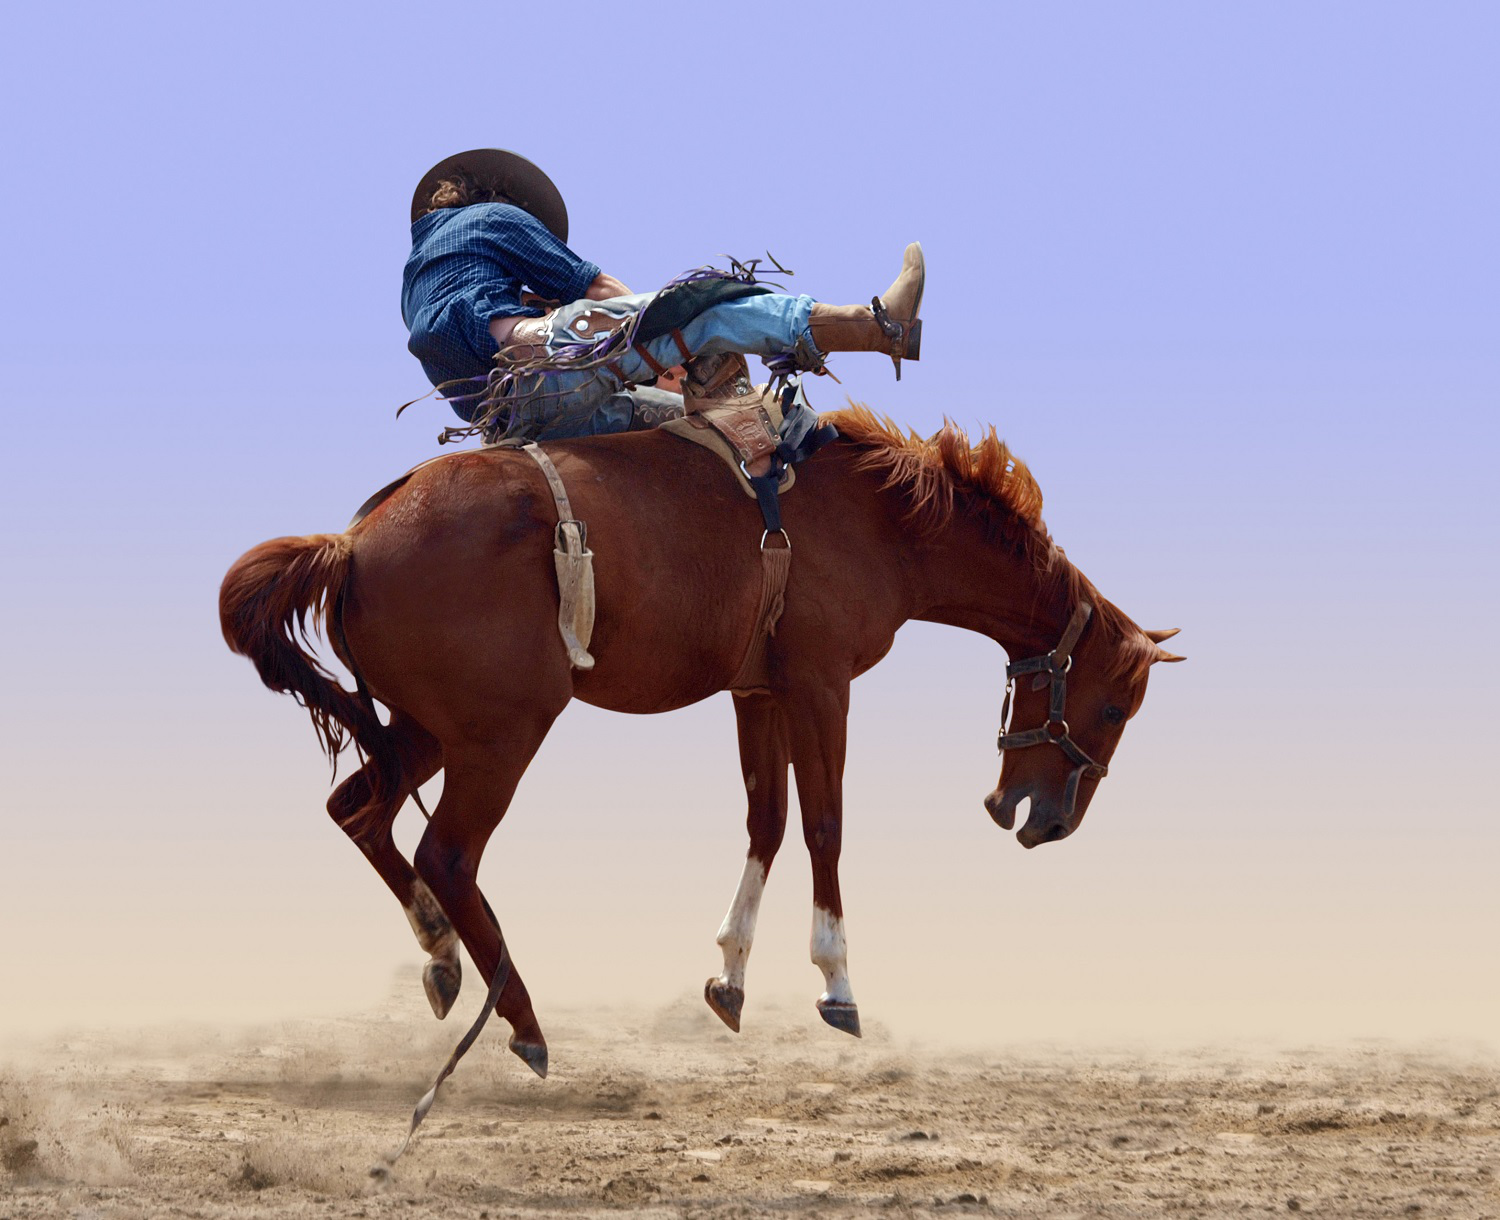

In [28]:
img=Image.open('C:/Users/Keitaro Ninomiya/Box Sync/PyTorch Practice/horse.jpg')
img

Normalize the image data.

In [29]:
preprocess = transforms.Compose([transforms.Resize(256),
transforms.ToTensor()])

In [30]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t,0)

In [31]:
batch_out = netG(batch_t)

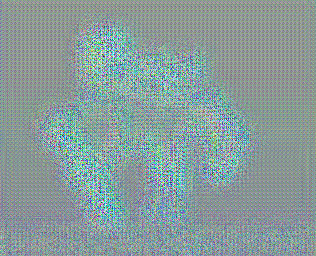

In [37]:
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
out_img

In [ ]:
C